In [62]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import quilt
from quilt.data.ResidentMario import geoplot_data
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
from shapely.geometry import Point

In [63]:
# Import cleaned dataset
gdp_df = pd.read_excel('state gdp per capita.xls', encoding = "UTF-8")
gdp_df.head()

,State,Abb,1997,1998,1999,2000,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Alabama,AL,31398,32164,33106,33284,33312,34068,34855,36702,...,37735,37522,36976,35376,35915,36192,36424,36611,36524,36750
1,Alaska,AK,61797,59504,58609,57184,58547,60101,59008,60137,...,64349,67228,67527,72204,69565,70573,73464,69596,67367,66835
2,Arizona,AZ,34434,36311,38300,39185,39170,39323,40769,41063,...,44086,44168,41800,38232,37936,38248,38537,38292,38293,38276
3,Arkansas,AR,30435,30513,31877,31834,31685,32514,33678,34936,...,35803,35205,34957,33837,34667,35158,34979,35848,36228,36259
4,California,CA,41345,43098,45541,48223,47216,47880,49501,51520,...,54842,55154,54454,51733,51869,52067,52912,53746,55247,56851


In [64]:
# Import the lat/long data for each state
state_locs = pd.read_csv('raw_data/state_lat_long.csv', usecols=['state name', 'latitude', 'longitude'])
state_locs = state_locs.rename(columns={"state name": "State","latitude":"Latitude","longitude":"Longitude"})
state_locs.head()
geodata = pd.read_csv('raw_data/geodata_clean.csv', usecols=['state name', 'geometry'])
geodata = geodata.rename(columns={"state name": "State","geometry":"geometry" })


In [65]:
mean_gdp = []

for index, row in gdp_df.iterrows():
    state = row["State"]
    
    avg_gdp = row[['1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011', '2012', '2013', '2014', '2015']].mean()
    
    mean_gdp.append(avg_gdp)
    
gdp_df["Mean GDP"] = mean_gdp


gdp_df.head()

,State,Abb,1997,1998,1999,2000,2001,2002,2003,2004,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Mean GDP
0,Alabama,AL,31398,32164,33106,33284,33312,34068,34855,36702,...,37522,36976,35376,35915,36192,36424,36611,36524,36750,35394.315789
1,Alaska,AK,61797,59504,58609,57184,58547,60101,59008,60137,...,67228,67527,72204,69565,70573,73464,69596,67367,66835,64458.947368
2,Arizona,AZ,34434,36311,38300,39185,39170,39323,40769,41063,...,44168,41800,38232,37936,38248,38537,38292,38293,38276,39444.263158
3,Arkansas,AR,30435,30513,31877,31834,31685,32514,33678,34936,...,35205,34957,33837,34667,35158,34979,35848,36228,36259,34003.263158
4,California,CA,41345,43098,45541,48223,47216,47880,49501,51520,...,55154,54454,51733,51869,52067,52912,53746,55247,56851,50869.421053


In [66]:
gdp_merge = pd.merge(gdp_df, state_locs, on="State")
gdp_merge = pd.merge(gdp_merge, geodata, on="State") 
gdp_merge.head()

,State,Abb,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,Mean GDP,Latitude,Longitude,geometry
0,Alabama,AL,31398,32164,33106,33284,33312,34068,34855,36702,...,35915,36192,36424,36611,36524,36750,35394.315789,32.7794,-86.8287,POINT (-86.8287 32.7794)
1,Arizona,AZ,34434,36311,38300,39185,39170,39323,40769,41063,...,37936,38248,38537,38292,38293,38276,39444.263158,34.2744,-11.6602,POINT (-11.6602 34.2744)
2,Arkansas,AR,30435,30513,31877,31834,31685,32514,33678,34936,...,34667,35158,34979,35848,36228,36259,34003.263158,34.8938,-92.4426,POINT (-92.4426 34.8938)
3,California,CA,41345,43098,45541,48223,47216,47880,49501,51520,...,51869,52067,52912,53746,55247,56851,50869.421053,37.1841,-19.4696,POINT (-19.4696 37.1841)
4,Colorado,CO,43558,46692,49040,51524,51113,50870,50743,50083,...,49258,49274,49622,50426,51899,52558,50164.421053,38.9972,-5.5478,POINT (-5.5478 38.9972)


In [67]:
# Dropping years to match other datasets
gdp_merge = gdp_merge.drop(columns = ["1997","1998","1999"])


Text(0,0.5,'Total GDP')

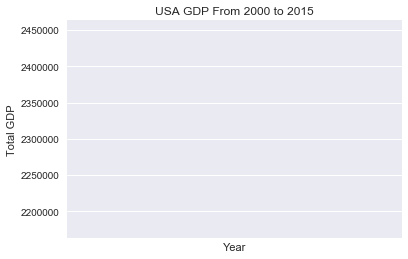

In [68]:
# Use Seaborn stylings
sns.set()

years = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010', '2011', '2012', '2013', '2014', '2015']
total_gdp = gdp_merge[years].sum()
plt.plot(years, total_gdp, marker = "o", color = "r")

# Set x limits
plt.xlim(1999,2016)
# Add labels
plt.title("USA GDP From 2000 to 2015")
plt.xlabel("Year")
plt.ylabel("Total GDP")
 
 


In [69]:
continental_usa = gpd.read_file(geoplot_data.contiguous_usa())
continental_usa = continental_usa.set_index("State")
# Geopandas is limited to continental US, so exclude Alaska and Hawaii
gdp_merge = gdp_merge.loc[(gdp_merge["State"] != 'Alaska') & (gdp_merge["State"] != 'Hawaii')]

AttributeError: 'Series' object has no attribute 'centroid'

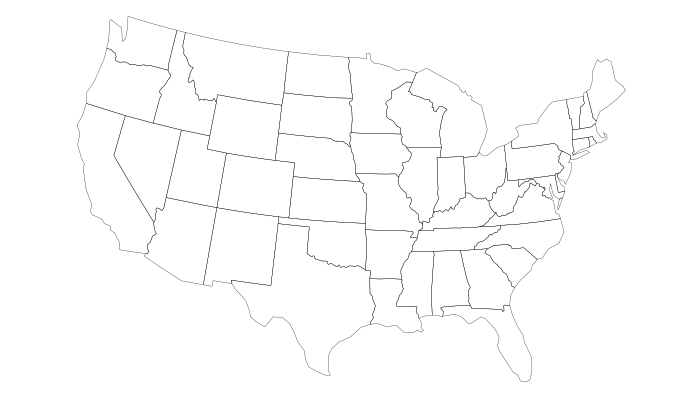

In [70]:
ax = gplt.polyplot(continental_usa, projection=gcrs.AlbersEqualArea(), figsize = (15,7))

gplt.aggplot(gdp_merge, projection=gcrs.AlbersEqualArea(), hue='Mean GDP', cmap='Reds',
             by='state name', geometry=continental_usa.geometry, ax=ax,
             linewidth=0)

plt.title("Mean GDP Since 2000s", size = 20)

plt.show()

In [ ]:
# Join to our geoDF to adjust by population
merged_df = pd.merge(gdf, census_df, on="state name")[["state name", "Fatalities", "Mean Population", "geometry"]]

merged_df["Fatalities adjusted by Population"] = 100000*merged_df["Fatalities"]/merged_df["Mean Population"]

merged_df.head()

In [ ]:
continental_usa = gpd.read_file(geoplot_data.contiguous_usa())
continental_usa = continental_usa.set_index("State")

ax = gplt.polyplot(continental_usa, projection=gcrs.AlbersEqualArea(), figsize = (15,7))

gplt.aggplot(merged_df, projection=gcrs.AlbersEqualArea(), hue='Fatalities adjusted by Population', cmap='Reds',
             by='state name', geometry=continental_usa.geometry, ax=ax, linewidth=0)

plt.title("Police Fatalities per 100,000 People since 2000", size = 20)

plt.show()